<a href="https://colab.research.google.com/github/prithwis/parashar21/blob/main/P21_Retrieve_v4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://1.bp.blogspot.com/_5QlanosqxiQ/SXLOLTu7S7I/AAAAAAAAAm8/0r6C7lCxsic/S1600-R/p21-header-003.png) <br>


---


![CC-BY-SA](https://licensebuttons.net/l/by-sa/3.0/88x31.png) ||
[Prithwis Mukerjee](http://www.yantrajaal.com) ||
Website - [Parashar21](https://parashar21.blogspot.com)<br>

#Connect, Retrieve

In [1]:
!apt install mongodb > /dev/null
from pymongo import MongoClient
import pandas as pd
import dateutil
import matplotlib.pyplot as plt
import math
#import string_utils

In [2]:
from google.colab import drive
drive.mount('/content/drive')
# -------------------------------------------
# copy credentials file
#!ls /content/drive/'My Drive'/Praxis/WebCredentials
!cp /content/drive/'My Drive'/Praxis/WebCredentials/clevercloudMongoDB.py credentials.py
# -------------------------------------------
# credential file for Prithwis Mukerjee
# this file needs to be in the VM

from credentials import rhostName,ruserName,rpassWord,rdbName,rMongoURI

#print(rhostName,ruserName,rdbName)
print(rdbName)
#print(rMongoURI)
# -------------------------------------------
mongoURI = rMongoURI                                   # for remote server
#mongoURI = "mongodb://localhost:27017/"
client = MongoClient(mongoURI)
client.list_database_names() # ['admin', 'local']
# ----------------------------------------------
# Show existing Collections
db = client.btncgfi3a5bxyea
#db.create_collection('p21Charts')       # Optional collection creation
# Show Collections. Query returns a Cursor [ ] ,  list it to see the content
list (db.list_collections())

Mounted at /content/drive
btncgfi3a5bxyea


[{'idIndex': {'key': {'_id': 1},
   'name': '_id_',
   'ns': 'btncgfi3a5bxyea.p21Charts',
   'v': 2},
  'info': {'readOnly': False,
   'uuid': UUID('af531836-28c4-4676-a261-5023436ae25d')},
  'name': 'p21Charts',
  'options': {},
  'type': 'collection'},
 {'idIndex': {'key': {'_id': 1},
   'name': '_id_',
   'ns': 'btncgfi3a5bxyea.restaurants',
   'v': 2},
  'info': {'readOnly': False,
   'uuid': UUID('7554cbbb-c8f2-47a2-8429-426588529a48')},
  'name': 'restaurants',
  'options': {},
  'type': 'collection'}]

In [3]:
kollection = db.p21Charts                   # Set the collection to work with
c = kollection.find()
for crnt in c:
    print(crnt)

{'_id': ObjectId('61dadf0a122357c5ce07bf23'), 'pid': {'tags': ['Engineer', 'Teacher', 'PostGraduate'], 'ck': 'M1961101523:425.522.5788.37', 'name': 'uoms'}, 'GLon': {'La': 98.204, 'Su': 178.826, 'Mo': 250.52, 'Ma': 196.183, 'Me': 193.17, 'Ju': 274.781, 'Ve': 153.753, 'Sa': 270.179, 'Ra': 122.089, 'Ke': 302.089}, 'GRet': {'La': False, 'Su': False, 'Mo': False, 'Ma': False, 'Me': True, 'Ju': False, 'Ve': False, 'Sa': False, 'Ra': False, 'Ke': False}}
{'_id': ObjectId('61dadf0a122357c5ce07bf24'), 'pid': {'tags': ['Author', 'Homemaker', 'PostGraduate'], 'ck': 'F1965121910:265.522.5788.37', 'name': 'opag'}, 'GLon': {'La': 310.415, 'Su': 243.701, 'Mo': 201.001, 'Ma': 273.467, 'Me': 222.269, 'Ju': 62.748, 'Ve': 284.966, 'Sa': 318.17, 'Ra': 41.248, 'Ke': 221.248}, 'GRet': {'La': False, 'Su': False, 'Mo': False, 'Ma': False, 'Me': False, 'Ju': True, 'Ve': False, 'Sa': False, 'Ra': False, 'Ke': False}}
{'_id': ObjectId('61dadf0a122357c5ce07bf25'), 'pid': {'tags': ['Engineer', 'Teacher', 'PostGra

In [4]:
c = kollection.find({'pid.name': {"$eq": 'mous'}})
for crnt in c:
    print(crnt)

In [5]:
c = kollection.find({'pid.tags': {"$in": ['Engineer','Teacher']}})
for crnt in c:
    print(crnt)

{'_id': ObjectId('61dadf0a122357c5ce07bf23'), 'pid': {'tags': ['Engineer', 'Teacher', 'PostGraduate'], 'ck': 'M1961101523:425.522.5788.37', 'name': 'uoms'}, 'GLon': {'La': 98.204, 'Su': 178.826, 'Mo': 250.52, 'Ma': 196.183, 'Me': 193.17, 'Ju': 274.781, 'Ve': 153.753, 'Sa': 270.179, 'Ra': 122.089, 'Ke': 302.089}, 'GRet': {'La': False, 'Su': False, 'Mo': False, 'Ma': False, 'Me': True, 'Ju': False, 'Ve': False, 'Sa': False, 'Ra': False, 'Ke': False}}
{'_id': ObjectId('61dadf0a122357c5ce07bf25'), 'pid': {'tags': ['Engineer', 'Teacher', 'PostGraduate'], 'ck': 'M199010923:095.522.5788.37', 'name': 'raohlo'}, 'GLon': {'La': 85.351, 'Su': 172.44, 'Mo': 63.984, 'Ma': 49.966, 'Me': 163.275, 'Ju': 105.898, 'Ve': 166.538, 'Sa': 265.202, 'Ra': 280.65, 'Ke': 100.65}, 'GRet': {'La': False, 'Su': False, 'Mo': False, 'Ma': False, 'Me': False, 'Ju': False, 'Ve': False, 'Sa': False, 'Ra': False, 'Ke': False}}


In [6]:
df = pd.DataFrame(list(kollection.find({'pid.tags': {"$in": ['Engineer','Teacher']}},{'pid.name':1,"_id":0,'GLon':1,'GRet':1})))
df

,pid,GLon,GRet
0,{'name': 'uoms'},"{'La': 98.204, 'Su': 178.826, 'Mo': 250.52, 'M...","{'La': False, 'Su': False, 'Mo': False, 'Ma': ..."
1,{'name': 'raohlo'},"{'La': 85.351, 'Su': 172.44, 'Mo': 63.984, 'Ma...","{'La': False, 'Su': False, 'Mo': False, 'Ma': ..."


#Utility Functions

In [7]:
#converting dict{ionary} to list and back

d2l = lambda dic: [(k, v) for (k, v) in dic.items()]
l2d = lambda lis: dict(lis)

#converts a Rashi number to the Rashi name
#
RashiName = ["RashiName","Ari","Tau","Gem","Can","Leo","Vir","Lib","Sco","Sag","Cap","Acq","Pis"]
def RashiN2A(n):
    return RashiName[n]

##Chart Drawing

In [8]:
def generateChartTxt():
    global txt
    txt = ['']*13
    for g,r in GRashiN.items():
        if r == 1:
            txt[1]= txt[1]+' '+g+('/R' if GRet[g] else '')
        if r == 2:
            txt[2]= txt[2]+' '+g+('/R' if GRet[g] else '')
        if r == 3:
            txt[3]= txt[3]+' '+g+('/R' if GRet[g] else '')
        if r == 4:
            txt[4]= txt[4]+' '+g+('/R' if GRet[g] else '')
        if r == 5:
            txt[5]= txt[5]+' '+g+('/R' if GRet[g] else '')
        if r == 6:
            txt[6]= txt[6]+' '+g+('/R' if GRet[g] else '')
        if r == 7:
            txt[7]= txt[7]+' '+g+('/R' if GRet[g] else '')
        if r == 8:
            txt[8]= txt[8]+' '+g+('/R' if GRet[g] else '')
        if r == 9:
            txt[9]= txt[9]+' '+g+('/R' if GRet[g] else '')
        if r == 10:
            txt[10]= txt[10]+' '+g+('/R' if GRet[g] else '')
        if r == 11:
            txt[11]= txt[11]+' '+g+('/R' if GRet[g] else '')
        if r == 12:
            txt[12]= txt[12]+' '+g+('/R' if GRet[g] else '')
            
    for i in range(1,13):
        if len(txt[i]) == 0:
            txt[i] = '*'
#print(txt[1],txt[2],txt[3],txt[4],txt[5],txt[6],txt[7],txt[8],txt[9],txt[10],txt[11],txt[12],)

# Plots the chart in the Bengal Format


def drawChart_Bengal():

    ChartFile = pName+ChartType+'.png'
    generateChartTxt()

    #id = ChartType+'\n'+pName+'\n'+pDate+'\n'+pTime+'\n'+pPlace
    id = ChartType+'\n'+pName
    if ChartType == 'Rashi':
        ChartColour = 'orange'
    else:
        ChartColour = 'olive'
    
        
    #plt.figure(figsize=(7,7))
    plt.figure(figsize=(7,7),facecolor=ChartColour)
    
    plt.axis('off')

    # draw vertical line 
    plt.plot([30, 30], [0, 90], 'k-', lw=2)
    plt.plot([60, 60], [0, 90], 'k-', lw=2)

    # draw horizontal line 
    plt.plot([0, 90], [30, 30], 'k-', lw=2)
    plt.plot([0, 90], [60, 60], 'k-', lw=2)

    #draw diagonal lines
    plt.plot([60,90],[60,90], 'k-', lw=2)
    plt.plot([0,30],[90,60], 'k-', lw=2)
    plt.plot([0,30],[90,60], 'k-', lw=2)
    plt.plot([0,30],[0,30], 'k-', lw=2)
    plt.plot([60,90],[30,0], 'k-', lw=2)

    plt.text(32, 38, id, fontsize=12)

    plt.text(32, 82, txt[1], fontsize=12)
    plt.text(8, 82, txt[2], fontsize=12)
    plt.text(2, 62, txt[3], fontsize=12)
    plt.text(2, 45, txt[4], fontsize=12)
    plt.text(2, 25, txt[5], fontsize=12)
    plt.text(8, 5, txt[6], fontsize=12)
    plt.text(32, 5, txt[7], fontsize=12)
    plt.text(62, 5, txt[8], fontsize=12)
    plt.text(68, 25, txt[9], fontsize=12)
    plt.text(68, 45, txt[10], fontsize=12)
    plt.text(68, 62, txt[11], fontsize=12)
    plt.text(62, 82, txt[12], fontsize=12)

    
    #plt.savefig("CurrentChart.png", bbox_inches='tight')
    plt.savefig(ChartFile, bbox_inches='tight')
    plt.show()

    
print ("drawChart_Bengal defined")


drawChart_Bengal defined


##Location of Graha in Rashi

In [10]:
# Convert the longitude of a Graha into its Rashi of residence
#
# Navamsa is different
# http://www.oocities.org/talk2astrologer/LearnAstrology/Details/Navamsa.html
#
# the logic for placing a Graha in a 'Navamsa' Rashi is as follows
# starting from Longitude 0 [ 'Normal' Aries / Mesha start point]
# upto Longitude 360, we divide the longitudes in 108 partitions with each 
# partition being 3.33333 degrees. These 108 partitions are now numbered 
# sequentially, except that once we reach 12, the next partition is 1, not
# 13. So we have 9 sequences running from 1 - 12 each. The number corresponding
# to the partition where the Graha falls is the Navamsa Rashi of the Graha


def Long2Rashi(x):
    if ChartType == 'Rashi':
        RashiNumber = math.floor(x[1]/30)+1
        return x[0],RashiNumber
    if ChartType == 'Navamsa':
        N1 = math.floor(x[1]/3.333333)+1
        N2 = N1%12
        if N2 == 0:
            RashiNumber = 12
        else:
            RashiNumber = N2
        return x[0],RashiNumber

def LocateGrahaInRashi():
    global GRashiN, GRashiA
    #Defines the Horoscope in terms of locating planets in their Rashis
    #
    GRashiN = l2d(list(map(lambda x : Long2Rashi(x), d2l(GLon))))
    print(GRashiN)

    GRashiA = {}
    for k,v in GRashiN.items():
        GRashiA[k] = RashiN2A(v)
        
    print(GRashiA)

#Analysis Procedures

In [11]:
def parseChartData(c):
    global GLon, GRet, pName
    GLon = c['GLon']
    GRet = c['GRet']
    pid = c['pid']
    pName = pid['name']
    

In [12]:
def processChart(c):
    parseChartData(c)
    LocateGrahaInRashi()
    drawChart_Bengal()
    #print(c)

#Driver Code

In [13]:
ChartType = 'Rashi'

{'La': 4, 'Su': 6, 'Mo': 9, 'Ma': 7, 'Me': 7, 'Ju': 10, 'Ve': 6, 'Sa': 10, 'Ra': 5, 'Ke': 11}
{'La': 'Can', 'Su': 'Vir', 'Mo': 'Sag', 'Ma': 'Lib', 'Me': 'Lib', 'Ju': 'Cap', 'Ve': 'Vir', 'Sa': 'Cap', 'Ra': 'Leo', 'Ke': 'Acq'}


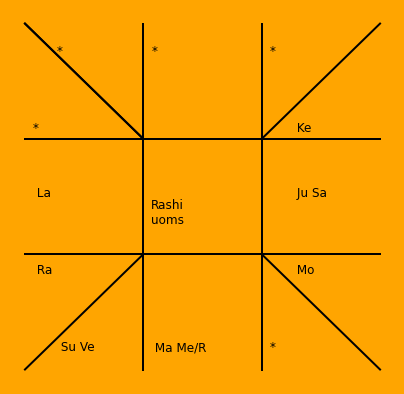

----
{'La': 3, 'Su': 6, 'Mo': 3, 'Ma': 2, 'Me': 6, 'Ju': 4, 'Ve': 6, 'Sa': 9, 'Ra': 10, 'Ke': 4}
{'La': 'Gem', 'Su': 'Vir', 'Mo': 'Gem', 'Ma': 'Tau', 'Me': 'Vir', 'Ju': 'Can', 'Ve': 'Vir', 'Sa': 'Sag', 'Ra': 'Cap', 'Ke': 'Can'}


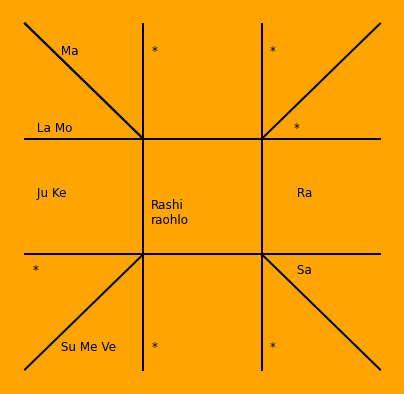

----


In [14]:
for chart in range(len(df)):
    chartData =df.iloc[chart]
    processChart(chartData)
    print('----')
    